In [1]:
print("hello world")

hello world


In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline 

Matplotlib is building the font cache; this may take a moment.


In [6]:
df = pd.read_csv(r"EasyVisa.csv", low_memory=False)

In [7]:
df.sample(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
9212,EZYV9213,Europe,Master's,Y,N,1783,2010,West,4543.3100,Year,Y,Certified
3908,EZYV3909,Asia,Bachelor's,N,N,1599,2013,West,146843.5200,Year,Y,Denied
11527,EZYV11528,Africa,High School,N,N,669,1980,Northeast,74479.5300,Year,N,Denied
10292,EZYV10293,South America,Bachelor's,Y,N,2050,1992,Northeast,66449.1000,Year,Y,Certified
11053,EZYV11054,Europe,Master's,Y,Y,778,1987,Northeast,85052.9000,Year,Y,Certified
22800,EZYV22801,Asia,Bachelor's,N,Y,3727,2004,West,13768.6300,Year,Y,Denied
20136,EZYV20137,Asia,Master's,Y,N,926,1913,Northeast,127648.2600,Year,Y,Denied
25131,EZYV25132,Asia,Master's,Y,N,1302,1952,South,37507.7500,Year,Y,Certified
20695,EZYV20696,Asia,Master's,Y,N,2542,2006,Midwest,47894.3600,Year,Y,Certified
9690,EZYV9691,North America,Bachelor's,N,N,836,2007,South,159.2978,Hour,Y,Denied


In [8]:
df.shape

(25480, 12)

In [9]:
# summary statistics
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [10]:
# check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


### Exploring data

In [14]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
We have 9 categorical features: ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [15]:
# proportion of count data on categorical features
for col in categorical_features:
    print(df[col].value_counts(normalize=True))
    print('-----------------------------------')

case_id
EZYV01       0.000039
EZYV16995    0.000039
EZYV16993    0.000039
EZYV16992    0.000039
EZYV16991    0.000039
               ...   
EZYV8492     0.000039
EZYV8491     0.000039
EZYV8490     0.000039
EZYV8489     0.000039
EZYV25480    0.000039
Name: proportion, Length: 25480, dtype: float64
-----------------------------------
continent
Asia             0.661735
Europe           0.146468
North America    0.129199
South America    0.033438
Africa           0.021625
Oceania          0.007535
Name: proportion, dtype: float64
-----------------------------------
education_of_employee
Bachelor's     0.401648
Master's       0.378100
High School    0.134223
Doctorate      0.086028
Name: proportion, dtype: float64
-----------------------------------
has_job_experience
Y    0.580926
N    0.419074
Name: proportion, dtype: float64
-----------------------------------
requires_job_training
N    0.884027
Y    0.115973
Name: proportion, dtype: float64
-----------------------------------
region_of

### Univariate Analysis

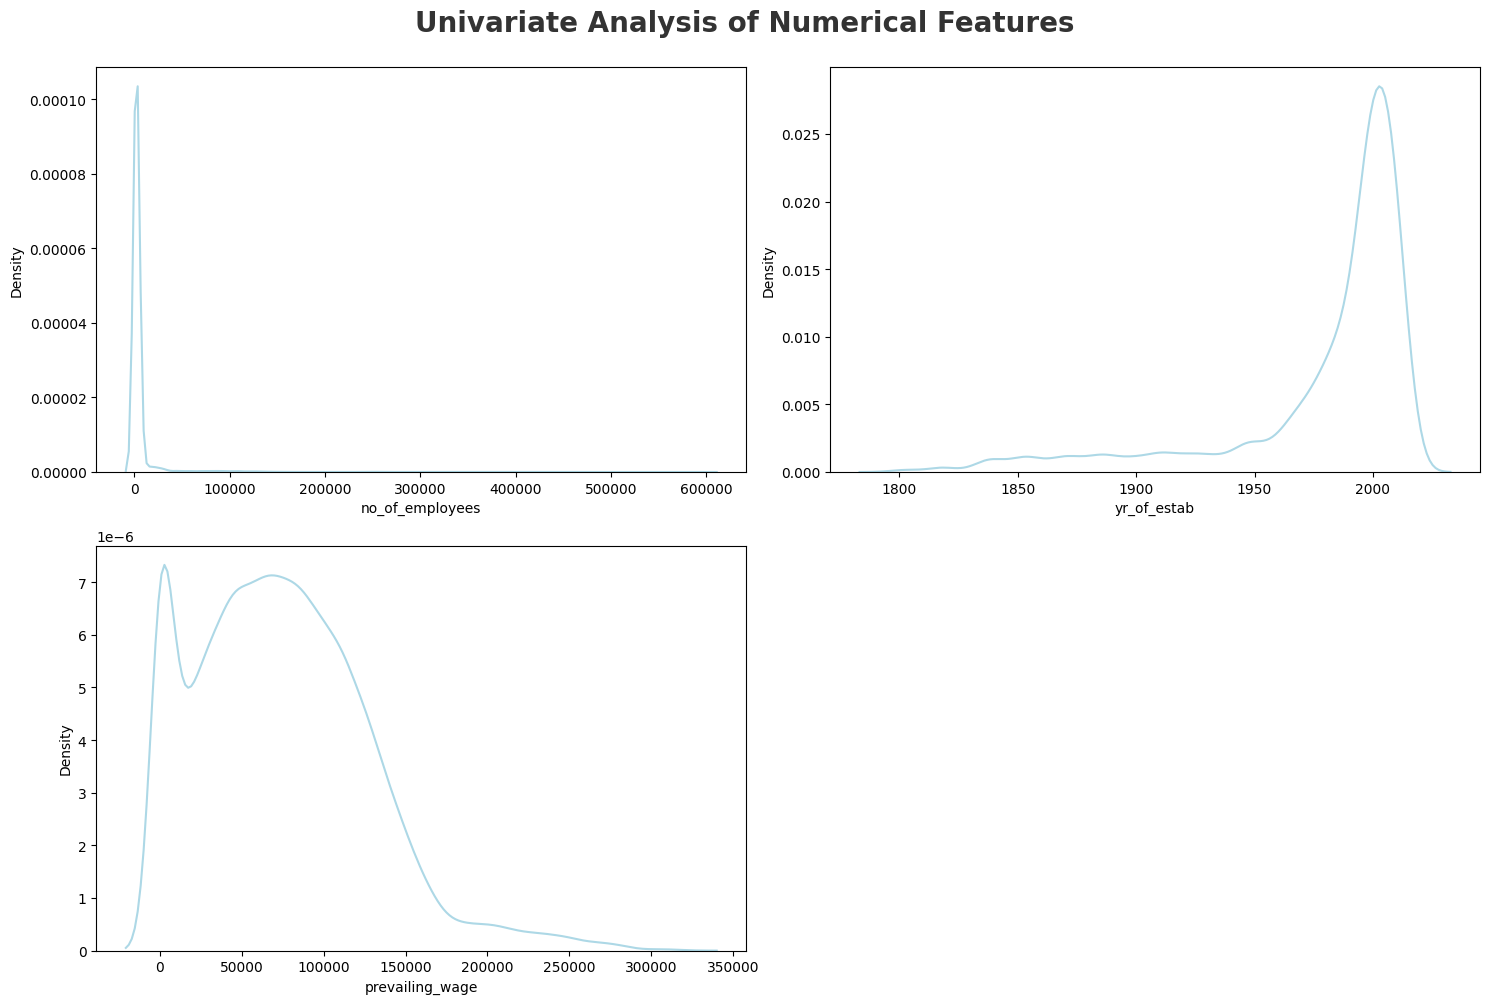

In [18]:
# Numerical features
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(df[numeric_features[i]], color='lightblue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

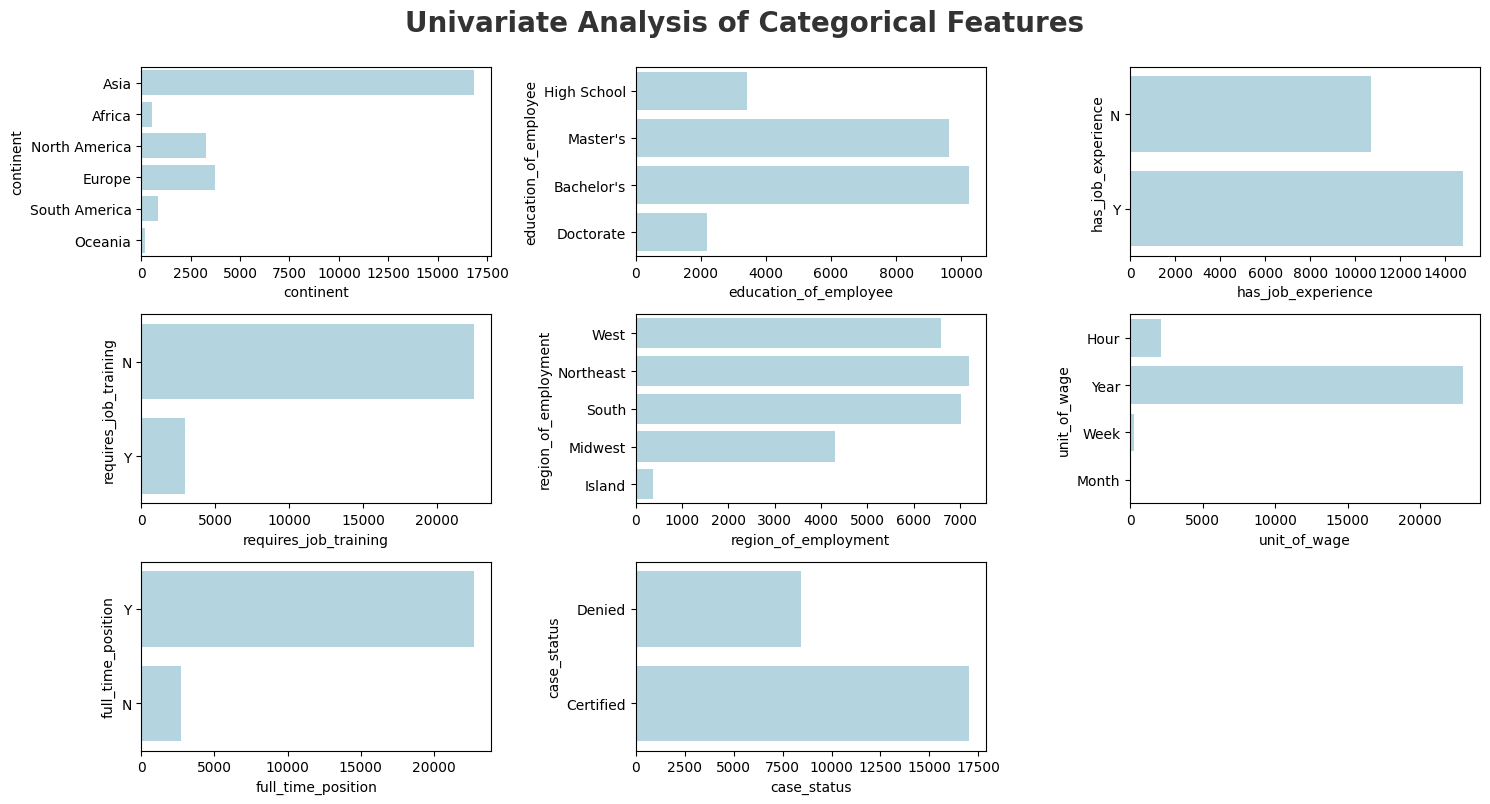

In [19]:
# Categorical features
categorical_features.remove('case_id')
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(df[categorical_features[i]], color='lightblue')
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

In [22]:
# Multivariate analysis
discrete_features = [feature for feature in numeric_features if len(df[feature].unique()) < 25]
continuous_features = [feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features: {}'.format(len(discrete_features), discrete_features))
print('\nWe have Continuous features: {}'.format(len(continuous_features), continuous_features))

We have 0 discrete features: []

We have Continuous features: 3


In [23]:
# Check multicollinearity  in m=numerical features
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [24]:
# check multicollinearity in categorical variables
from scipy.stats import chi2_contingency

chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Accept Null Hypothesis')

result = pd.DataFrame(data=[categorical_features, chi2_test]).T 
result.columns = ['Feature', 'Hypothesis Test Result']
result


,Feature,Hypothesis Test Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Accept Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


### Checking Null Values


In [25]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [26]:
continuous_features = [feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continuous features: ', continuous_features)

Num of continuous features:  ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


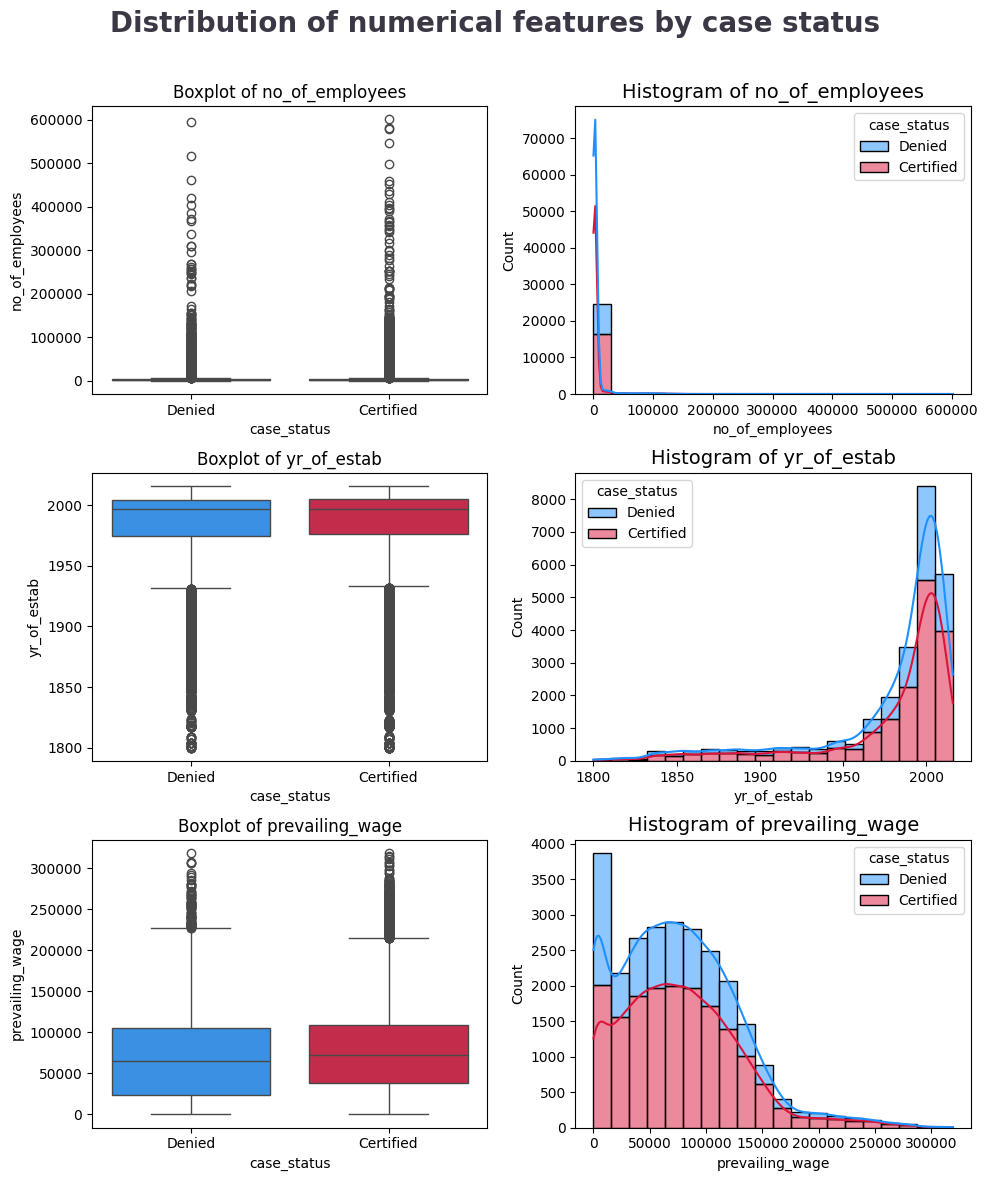

In [27]:
clr = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Distribution of numerical features by case status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')

for i, col in enumerate(continuous_features):
    sns.boxplot(data=df, x='case_status', y=col, palette=clr, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12) 
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True,
                    multiple='stack', palette=clr, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
plt.tight_layout()
fig.subplots_adjust(top=0.90)

### Visualization
## Visualize the target feature

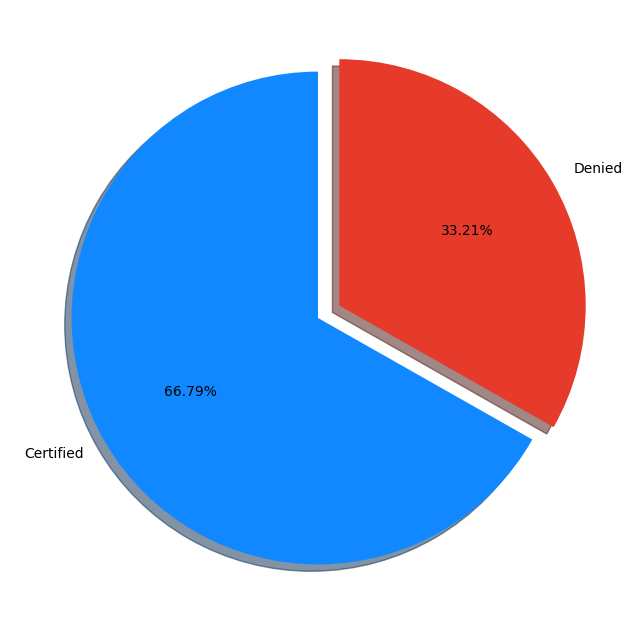

In [32]:
percentage = df.case_status.value_counts(normalize=True)*100
labels = ["Certified", "Denied"]

fig, ax = plt.subplots(figsize=(15,8))
explode = (0, 0.1)
colors = ['#1188ff', '#e63a2a']
ax.pie(percentage, labels=labels, startangle=90,
        autopct='%1.2f%%', explode=explode, shadow=True, colors=colors)
plt.show()

In [34]:
# does applicant continent has any impact on visa staus 
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

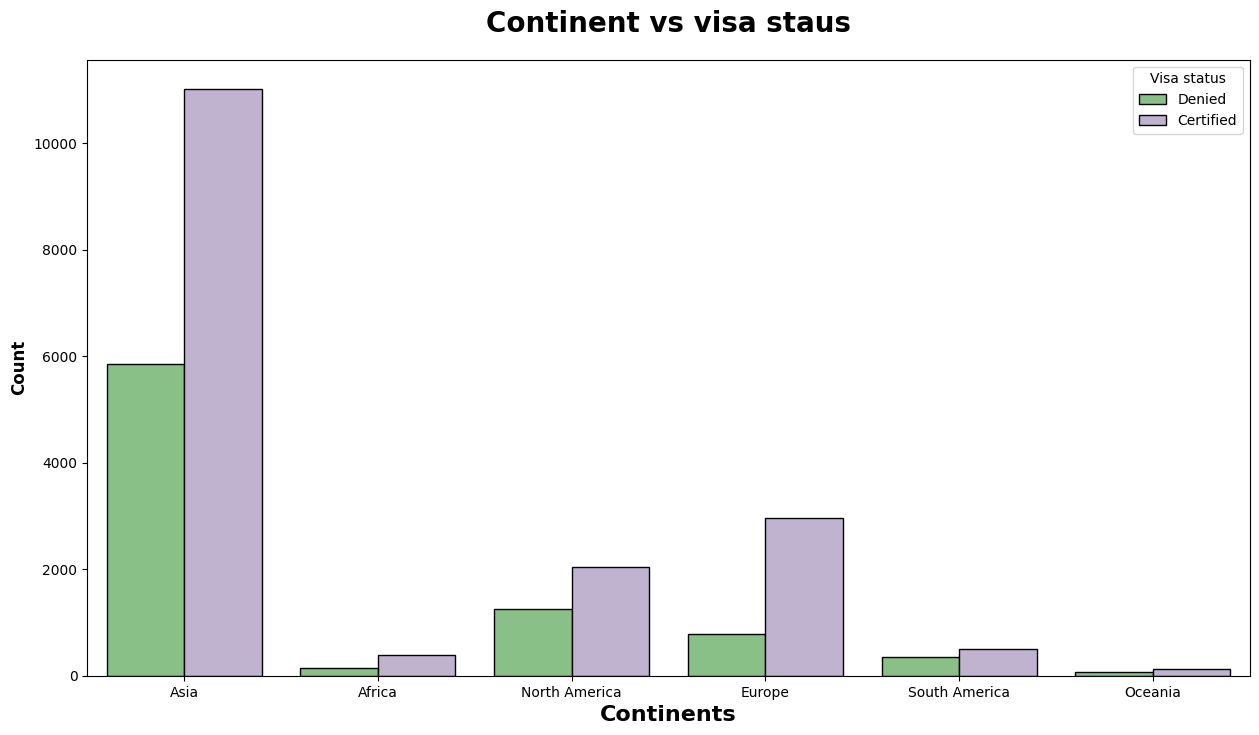

In [37]:
plt.subplots(figsize=(15,8))
sns.countplot(x='continent', hue='case_status', data=df, ec="black", palette="Accent")
plt.title('Continent vs visa staus', weight="bold", fontsize=20, pad=20)
plt.ylabel('Count', weight="bold", fontsize=12)
plt.xlabel('Continents', fontsize=16, weight="bold")
plt.legend(title="Visa status", fancybox=True)
plt.show()

In [39]:
df2 = df.copy()

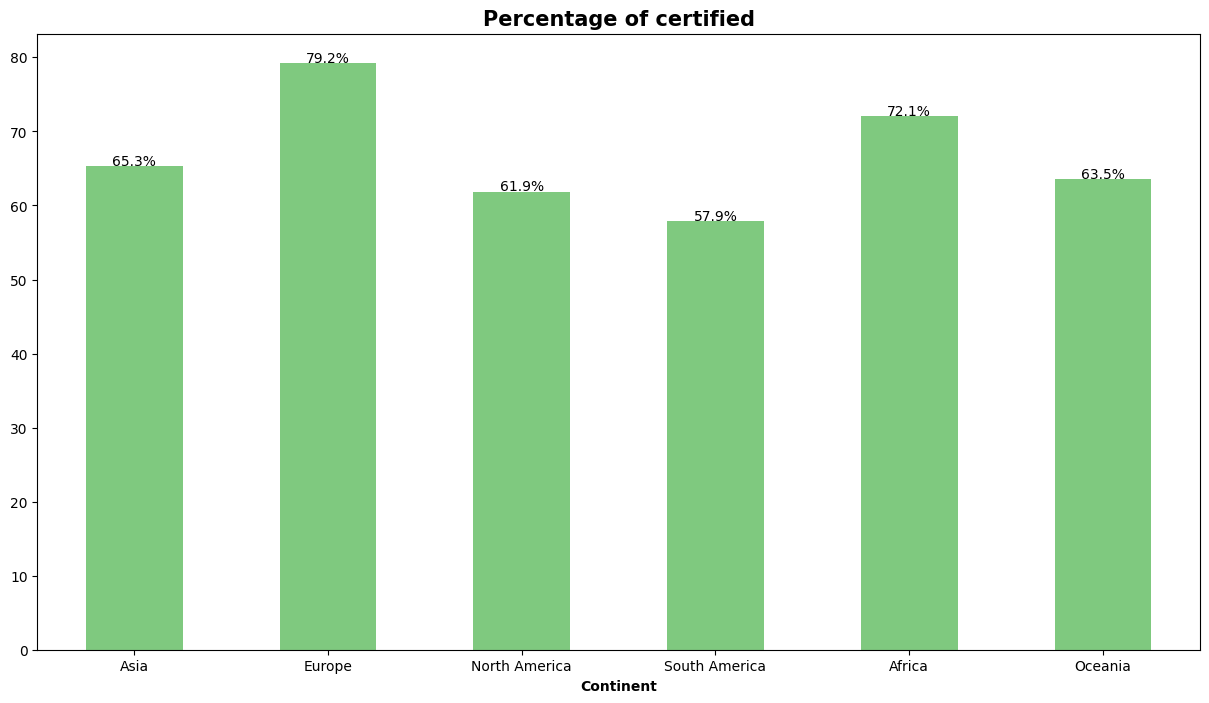

In [42]:
plt.figure(figsize=(15,8))

(100*df2[df["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts()).plot(
    kind='bar', stacked=True, colormap='Accent'
)

plt.title("Percentage of certified", fontsize=15, fontweight='bold')
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts())

for n in range(order1.shape[0]):
    count = order1[n]
    start='{:0.1f}%'.format(count)
    plt.text(n, count+0.1, start, ha='center')

plt.xlabel('Continent', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

In [43]:
# Does prevailing wage has any impack on Visa status
df.groupby('prevailing_wage')['case_status'].value_counts()

prevailing_wage  case_status
2.1367           Certified      1
2.9561           Denied         1
3.0031           Denied         1
3.3188           Denied         1
3.4889           Certified      1
                               ..
311734.4900      Certified      1
314156.0600      Certified      1
315497.6000      Certified      1
318446.0500      Certified      1
319210.2700      Denied         1
Name: count, Length: 25462, dtype: int64

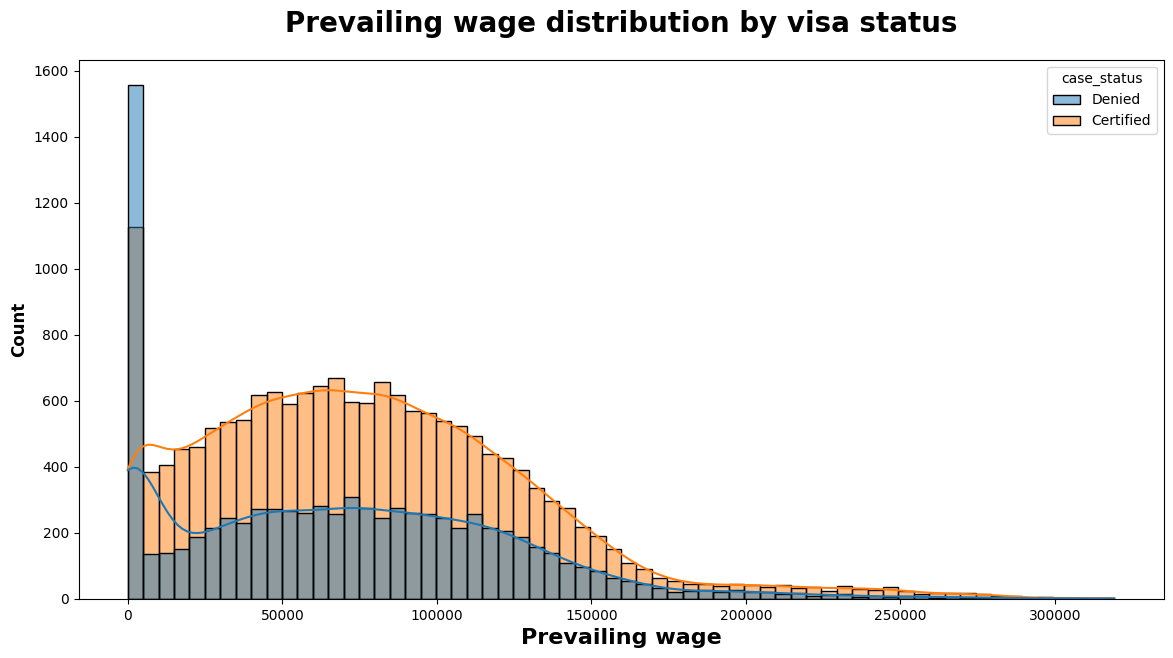

In [45]:
plt.subplots(figsize=(14,7))
sns.histplot(x="prevailing_wage", hue="case_status", data=df, kde=True)
plt.title('Prevailing wage distribution by visa status', weight="bold", fontsize=20, pad=20)
plt.ylabel('Count', weight="bold", fontsize=12)
plt.xlabel('Prevailing wage', fontsize=16, weight="bold")
plt.show()